# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [2]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tips = pd.read_csv('data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

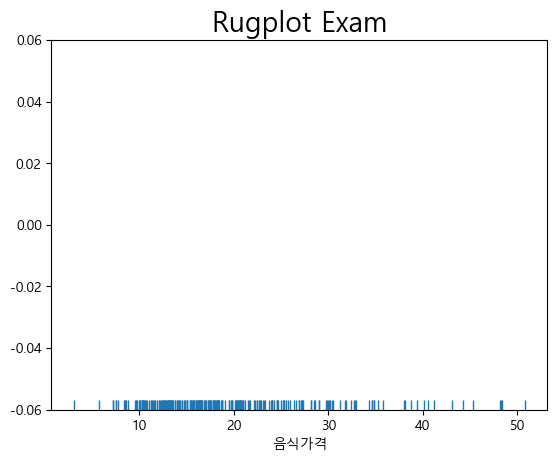

In [7]:
# data=DataFrame객체, x="X축의들어갈컬럼명", y="Y축에들어갈컬럼명"
sns.rugplot(x='total_bill', data=tips)
plt.title("Rugplot Exam")
plt.xlabel("음식가격")
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

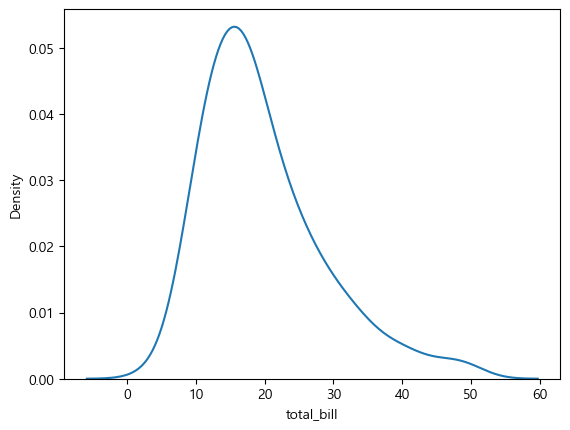

In [8]:
sns.kdeplot(data=tips, x='total_bill')
plt.show()

## displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

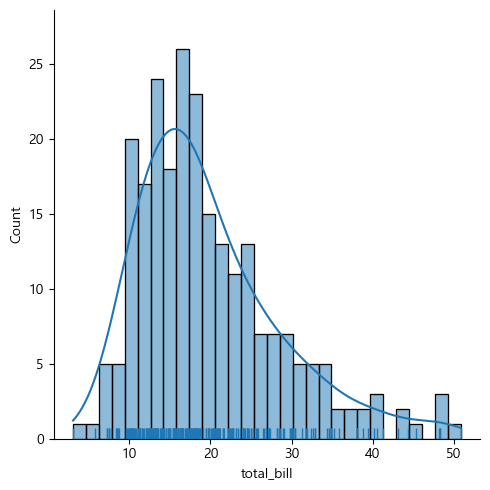

In [7]:
sns.displot(data=tips, x='total_bill', bins=30,
            rug=True, 
            kde=True);


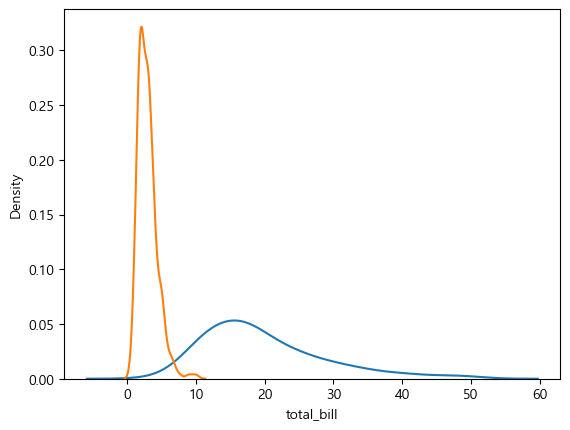

In [10]:
sns.kdeplot(data=tips, x='total_bill')
sns.kdeplot(data=tips, x='tip')
plt.show()

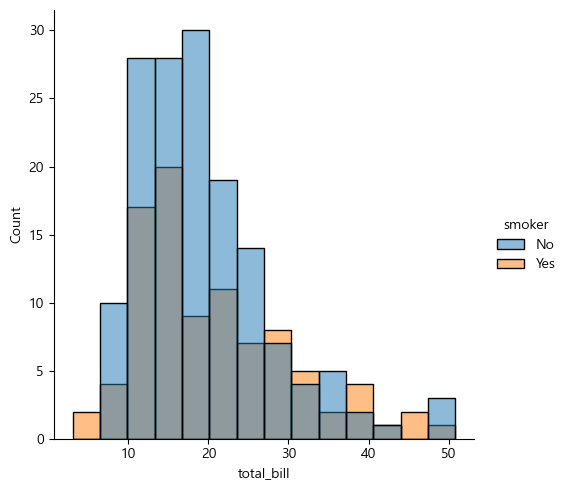

In [9]:
#hue='범주형' hue에 지정한 컬럼의 값이 다른 행들을 나눠서 시각화.
sns.displot(data=tips, x='total_bill', hue="smoker")
plt.show()

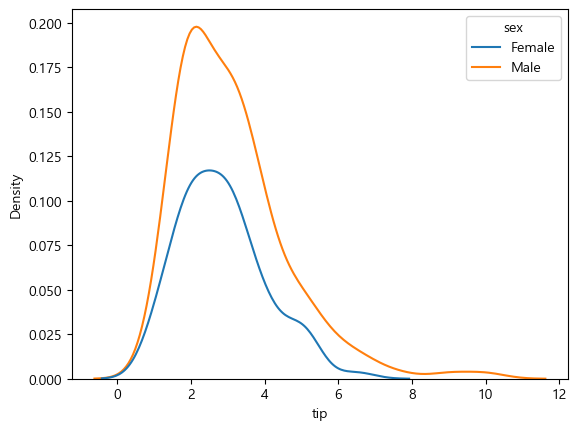

In [18]:
sns.kdeplot(data=tips, x='tip', hue='sex');

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

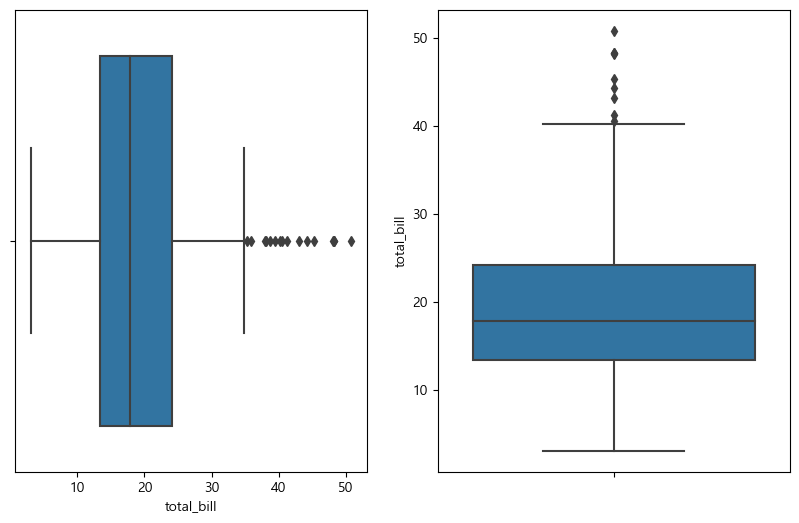

In [23]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=tips, x='total_bill', whis=1)

plt.subplot(1,2,2)
sns.boxplot(data=tips, y='total_bill')
plt.show()

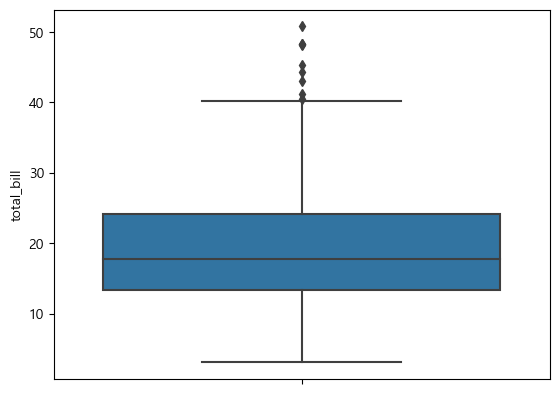

In [21]:
sns.boxplot(data=tips, y='total_bill')
plt.show()

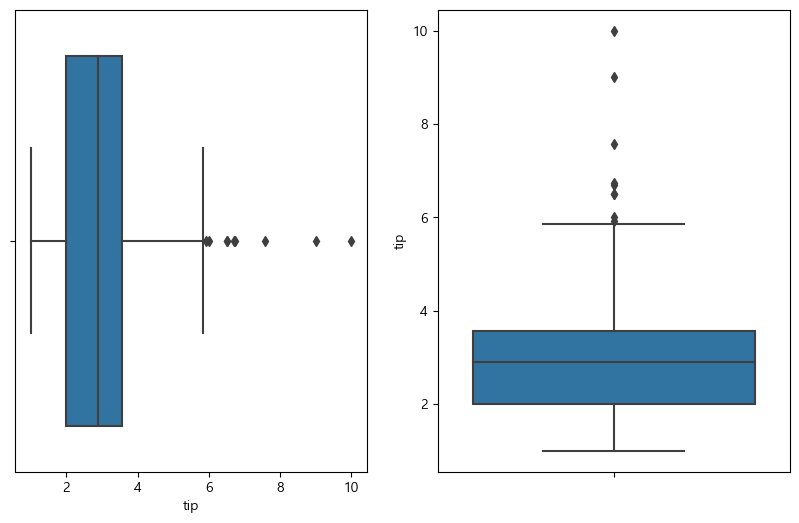

In [25]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.boxplot(data=tips, x='tip', ax=ax1) #ax=ax1 : 그래프를 그릴 axes(subplot)을 지정.
sns.boxplot(data=tips, y='tip', ax=ax2)

plt.show()

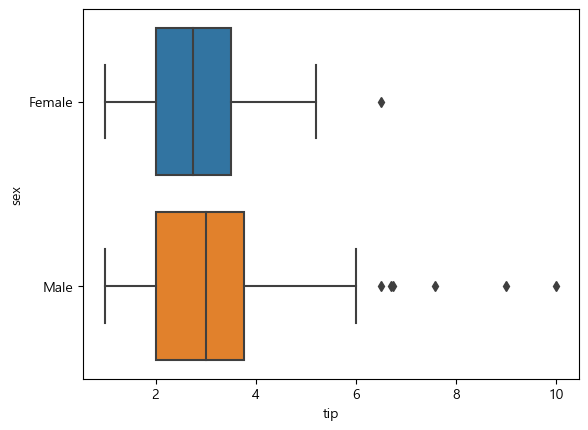

In [28]:
# 성별로 나눠서 tip의 분포를 비교 -> x: 분포를 확인할 컬럼을 지정. y: 범주형-나눌 기준 컬럼
sns.boxplot(data=tips, x='tip', y='sex')
plt.show()

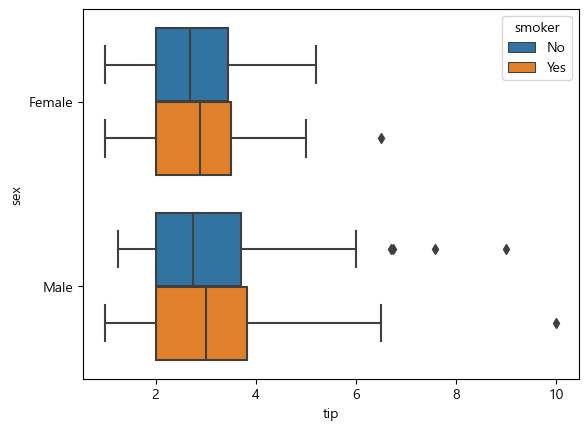

In [30]:
sns.boxplot(data=tips, x='tip', y='sex', hue='smoker')
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

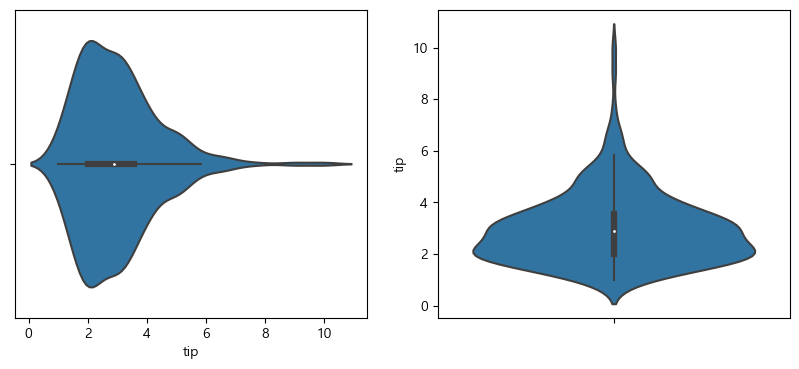

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.violinplot(data=tips, x='tip')

plt.subplot(1, 2, 2)
sns.violinplot(data=tips, y='tip')

plt.show()

<Axes: xlabel='tip', ylabel='day'>

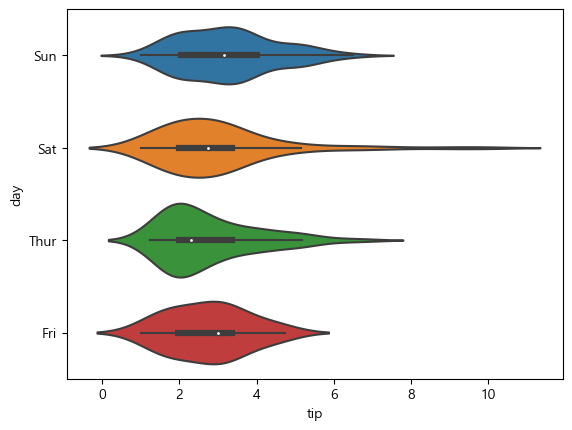

In [33]:
sns.violinplot(data=tips, x='tip', y="day")

<Axes: xlabel='tip', ylabel='day'>

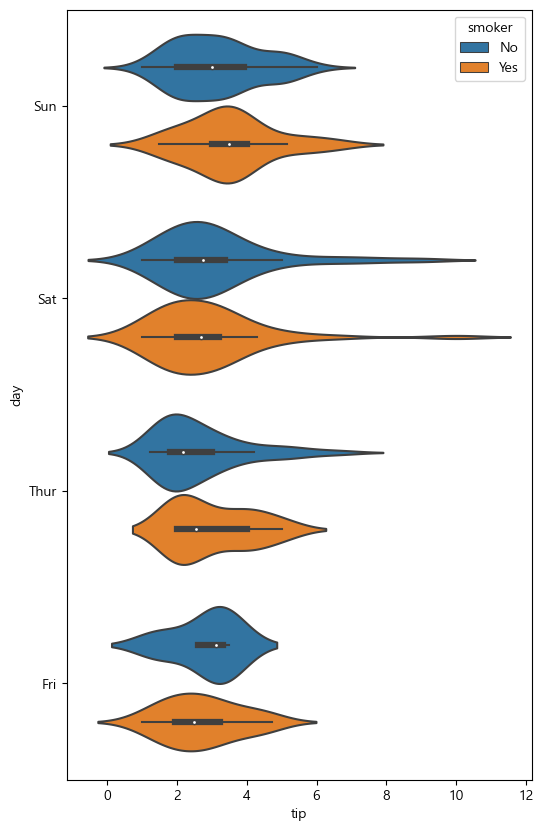

In [35]:
plt.figure(figsize=(6, 10))
sns.violinplot(data=tips, x='tip', y="day", hue='smoker')

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

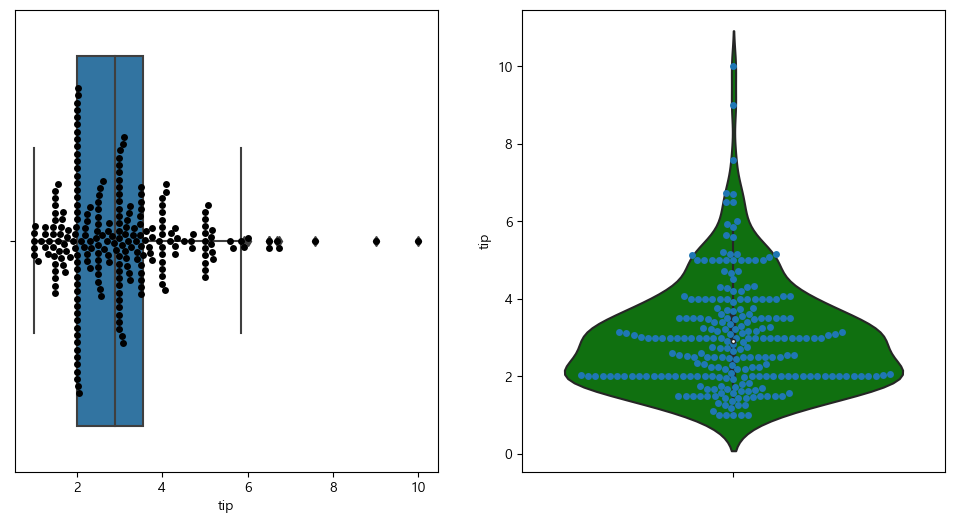

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.boxplot(data=tips, x='tip')
sns.swarmplot(data=tips, x='tip', color='black')

plt.subplot(1,2,2)
sns.swarmplot(data=tips, y='tip')
sns.violinplot(data=tips, y='tip', color='green')
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

In [45]:
# tips['day'].value_counts().plot(kind='bar')

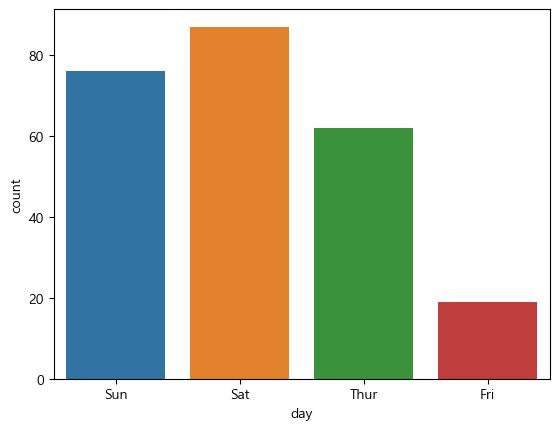

In [46]:
sns.countplot(data=tips, x='day')
plt.show()

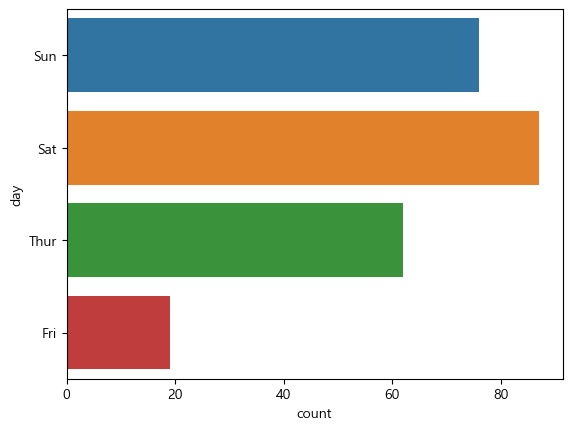

In [47]:
sns.countplot(data=tips, y='day')
plt.show()

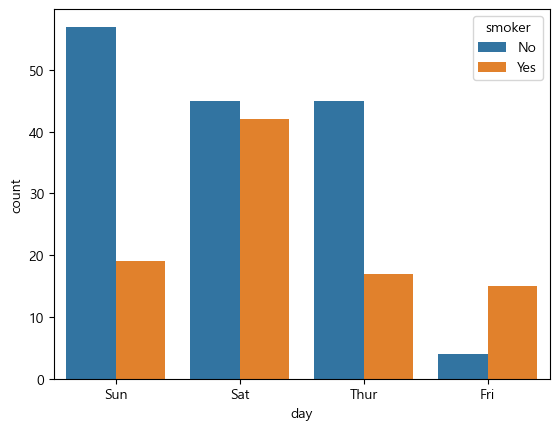

In [50]:
# 요일별로 흡연/비흡연 손님의 수
sns.countplot(data=tips, x='day', hue="smoker");

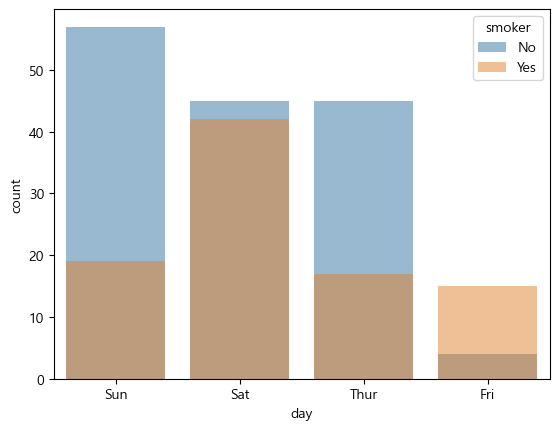

In [53]:
sns.countplot(data=tips, x='day', hue="smoker",
              dodge=False, alpha=0.5); # 수평누적막대그래프 여부: True(기본), False: 수직누적

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

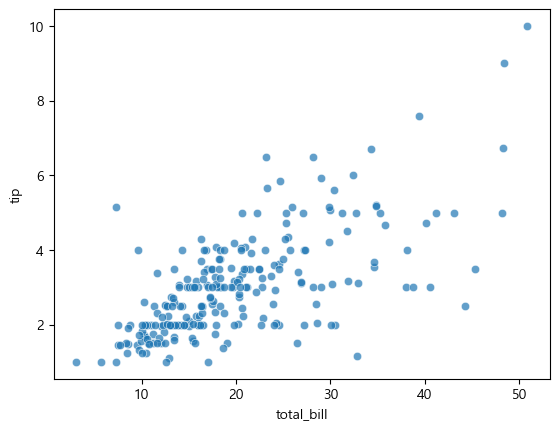

In [55]:
sns.scatterplot(data=tips, x="total_bill", y='tip', alpha=0.7);

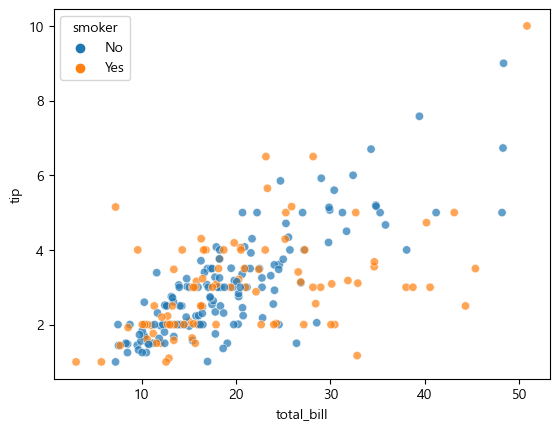

In [56]:
sns.scatterplot(data=tips, x="total_bill", y='tip', alpha=0.7, hue='smoker');

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

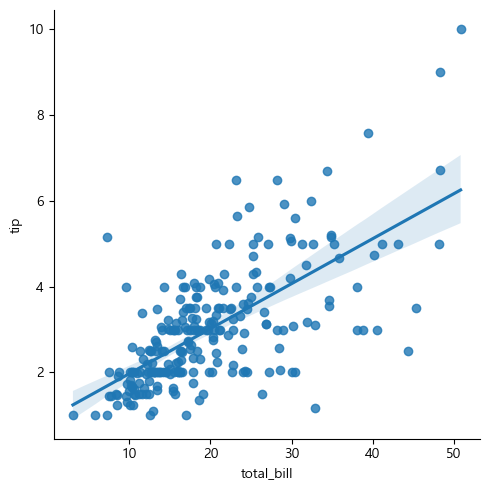

In [57]:
sns.lmplot(data=tips, x='total_bill', y='tip');

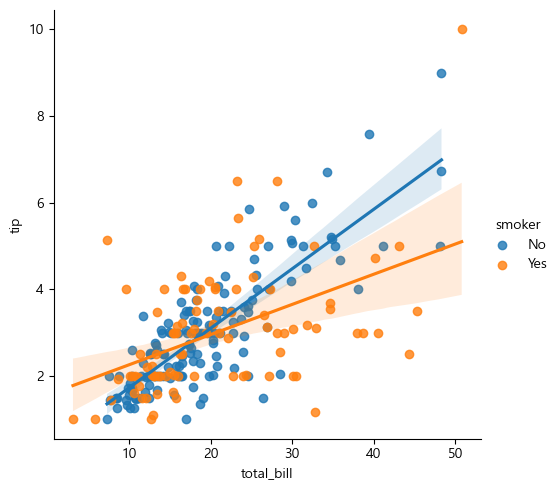

In [58]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker');

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

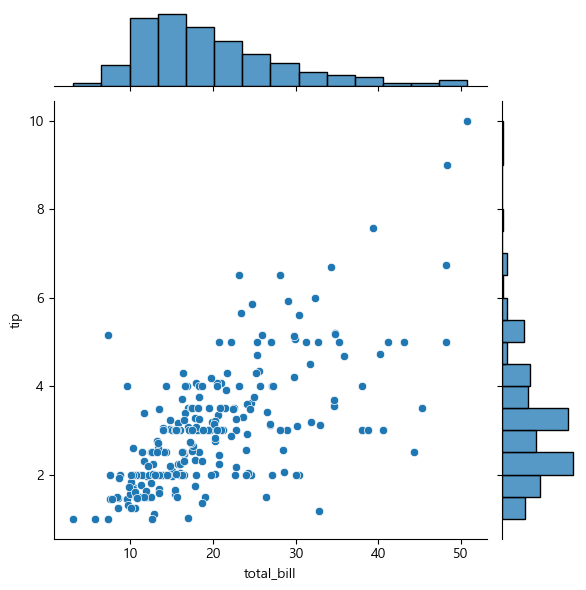

In [59]:
sns.jointplot(data=tips, x='total_bill', y='tip');


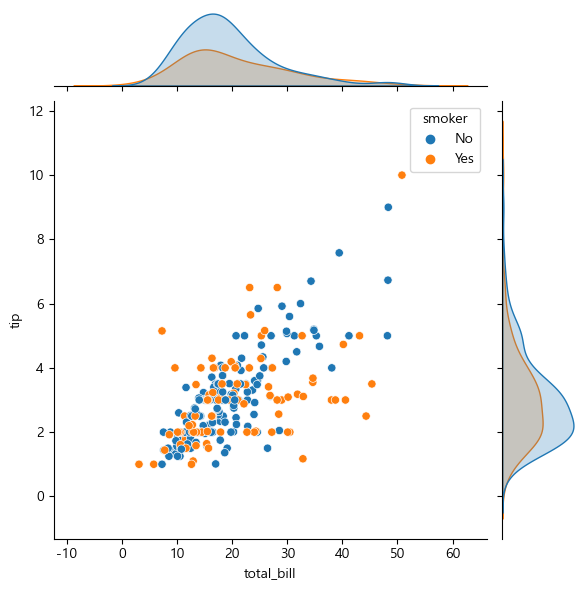

In [60]:
sns.jointplot(data=tips, x='total_bill', y='tip', hue="smoker");

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

In [61]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


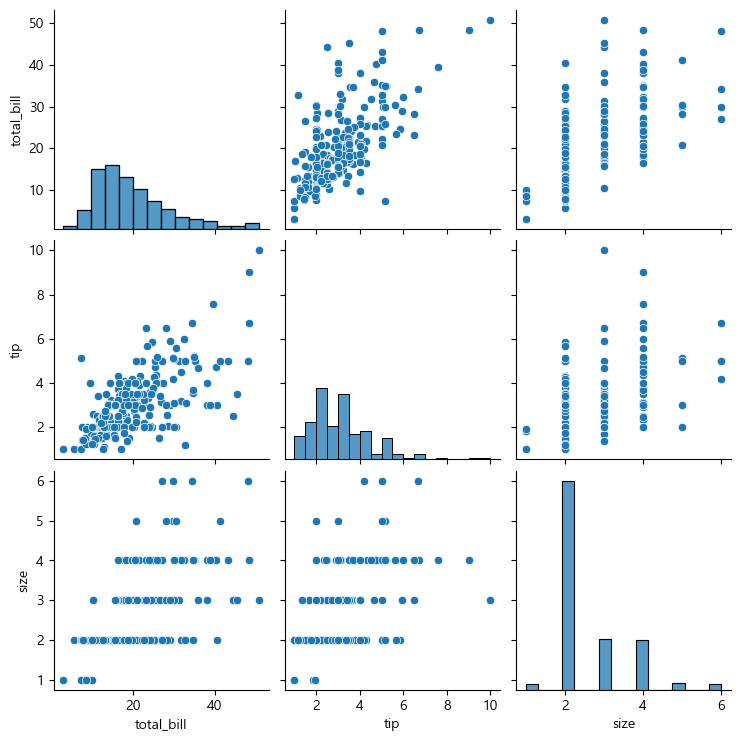

In [62]:
sns.pairplot(tips);

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [64]:
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


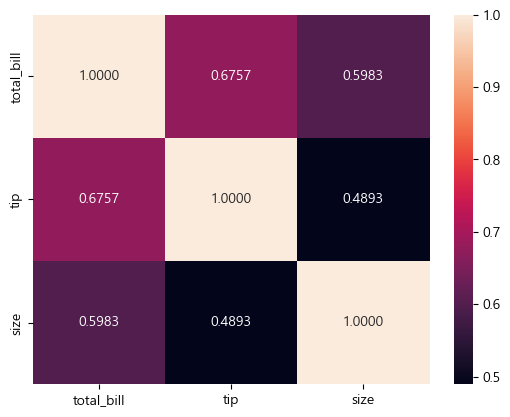

In [67]:
sns.heatmap(corr, annot=True, fmt='.4f')
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [70]:
df = pd.read_excel('data/강수량.xlsx', index_col="계절").T
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


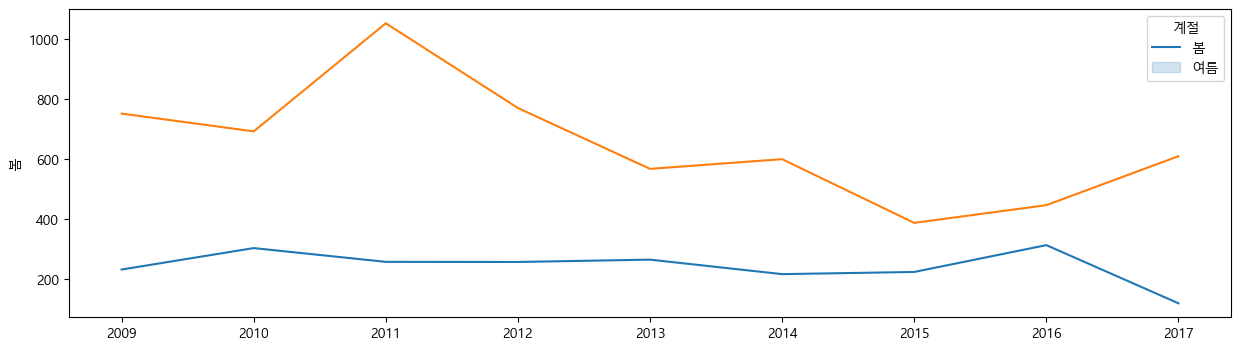

In [76]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x=df.index, y='봄')
sns.lineplot(data=df, x=df.index, y='여름')
plt.legend(["봄", "여름"], title='계절')
plt.show()

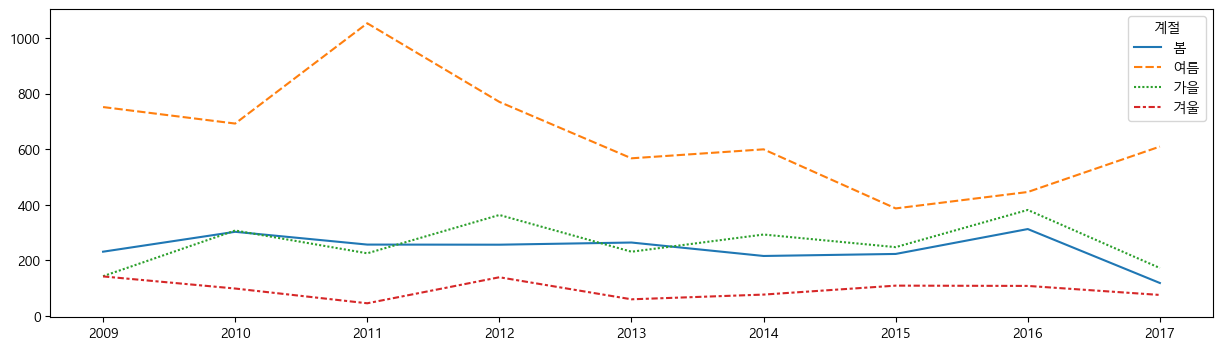

In [77]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df)
plt.show()